In [1]:
# Import the training functions
from train import train, generate_graph

In [2]:
# Fix the random seed, for reproducibility
import numpy as np
np.random.seed(628496)

# Define the inputs

Three variables are required to generate the graph: raw_accounts, edges_by_day and last_day.

In [3]:
# Each account is a tuple with:
# - The name of the account
# - The account number (or other unique identifier)
# - The opening balance of the account
# - The mapping of the account (i.e. the associated accounting concept)

sales_account = ('sales', '7000', -0.1, 'revenue')
debtors_account = ('debtors', '4000', 0.4, 'debtors')
bank_account = ('bank', '5500', 0.6, 'bank')

# raw_accounts is an ordered list of these accounts
raw_accounts = [sales_account, debtors_account, bank_account]

In [4]:
# Edges by day is a dictionary with the days (integers starting from 0) as the keys.
# Each day is a list of tuples. The tuples are:
# - The index of the source account (i.e. the credit account)
# - The index of the destination account (i.e. the debit account)
# - The monetary value of the transaction (a positive number)

# Therefore, this represent a sale of £10 on the first day
# of the accounting period, a credit note of £1 on the third
# day and the remaining £9 settling from debtors to bank
edges_by_day = {
    0: [(0, 1, 10.0)],
    2: [(1, 0, 1.0), (1, 2, 9.0)]
}

In [5]:
# last_day is the last day of the accounting period. This is required
# because there may be days at the end of the accounting period with
# no edges.

# For example, in our data we know we have transactions on the first day
# and the third day, but we don't know how many days there are in the
# whole accounting period. Let's say it is five days.
last_day = 4

# Generate the graph

In [6]:
# Choose the node dimension. Additional parameters can be chosen using
# the graph_kwords argument

graph = generate_graph(
    raw_accounts=raw_accounts,
    edges_by_day=edges_by_day,
    last_day=last_day,
    node_dimension=256
)

# Train

100%|██████████| 1500/1500 [00:08<00:00, 180.75it/s]


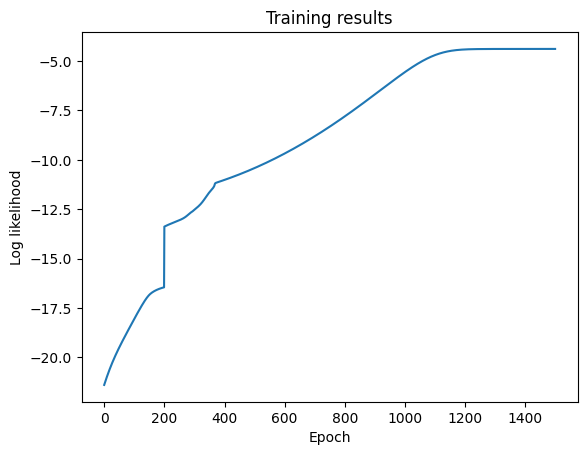

In [7]:
# Choose how many epochs to train for
training_epochs = 1500

# Choose when to enable the spontaneous part of the model
# It is best to allow only the causal part to run at the
# start of training, otherwise the spontaneous part many
# dominate the training and the causal part will not have
# a chance to converge.
start_spontaneous_from = 200

# Run the training
log_likelihoods = train(
    graph=graph,
    edges_by_day=edges_by_day,
    last_day=last_day,
    iterations=training_epochs,
    plot_log_likelihood=True,
    use_tqdm=True,
    spontaneous_learning_startpoint=start_spontaneous_from
)